# Introducción a Ocean.

```{index} solvers Ocean, samplers, solvers, QPU
```

En este apartado vamos a hacer una introducción a Ocean SDK, que es el lenguaje para poder implementar código que formalice los problemas de optimización con los que nos enfrentamos. 

Para una correcta instalación de este sofware se recomienda seguir los pasos que se pueden encontrar <a href="https://docs.ocean.dwavesys.com/en/latest/overview/install.html" target="_blank"> en esta guía de instalación</a>.

Igualmente para comenzar a familiarizarse con estas herramientas, se recomienda <a href="https://www.dwavesys.com/media/fmtj2fw3/20210920_ofbguide.pdf"> consultar este enlace </a>. Igualmente toda la documentación oficial de Ocean se puede <a href="https://docs.ocean.dwavesys.com/en/stable/" target="_blank"> consultar igualmente en esta dirección web </a>

Para encontrar el estado de energía mínima para un modelo cuadrático(en adelante QM) (la asignación de valores variables que nos da el valor mínimo de energía para nuestro QM), el Ocean SDK proporciona *samplers* y *solvers*. 

Un **solver** es un recurso que ejecuta un problema. Los **samplers** son procesos que ejecutan un problema muchas veces para obtener una colección de muestras, cada una de las cuales es una posible solución a nuestro problema. Por comodidad nos referiremos generalmente a los samplers de Ocean como un todo, para incluir también a los solvers.

Una vez que se tiene definido un problema QUBO y un modelo de tipo binary quadratic model (BQM), necesitamos conocer cómo podemos submitir nuestro programa en el computador cuántico. Entonces para poder enviar nuestros programas al QPU (quantum processing unit), necesitamos utilizar Ocean SDK, que es un paquete para utilizar desde python y que además es de tipo open-source. 

En la siguiente figura se muestra un esquema de la pila de software de Ocean

En la parte inferior están los recursos informáticos con los que puede interactuar al usuario. D-Wave  proporciona acceso a su QPU  y también se puede tener recursos adicionales como CPUs, GPUs. 

![](img/oceanSDK.PNG)

Por encima de los recursos informáticos tenemos los samplers y solvers. Estos son  los diferentes algoritmos y herramientas disponibles para resolver un problema por parte de usuario final.

Algunos de los samplers interactúan con los recursos cuánticos, como la API de D-Wave interactúa con la QPU. 
. Otros son sampllers clásicos como el recocido simulado  en hardware clásico, y otros son híbridos, como el Hybrid Solver Service. 

Para algunos dominios de problemas especiales, como la teoría de grafos o la satisfacción de restricciones 
D-Wave dispone de paquetes especializados. La capa verde de paquetes en la parte superior, son paquetes de clientes individuales escritos para sus aplicaciones específicas.  En aplicaciones concretas , es probable que el usuario construya sus propios paquetes y  pipelines que se asientan sobre el Kit de Desarrollo de Software Ocean, o SDK.

Dentro del SDK de Ocean hay muchos paquetes diferentes disponibles para los usuario. <a href="https://docs.ocean.dwavesys.com/en/stable/" target="_blank"> En este enlace se pueden ver los paquetes disponibles</a>, cada uno de los cuales tiene una función diferente. 

Asi por ejemplo , *dwave-cloud-client* se llama cada vez que se  envía un problema al sistema de D-Wave en 
la nube, y el paquete   *minorminer* se utiliza para averiguar dónde y cómo mapear el problema del usuario
en el chip físico. Cada paquete tiene una función diferente, y todos ellos trabajan juntos para ejecutar tu problema.

Para trabajar con estos métodos, lo primero que hay que hacer es mapear el problema a resolver a un modelo binario de tipo QUBO. Una vez se tenga bien definido el problema QUBO, las herramientas de software de D-wave construirán las herramientas de la máquina cuántica adecuadas o QMI, entendiendo por este último concepto, el conjunto de instrucciones utilizadas para asignar el problema al chip a nivel de hardware, siendo el SDK de Ocean el encargado de hacer este tipo de trabajo totalmente trasparente al usuario final.

Básicamente los pasos a seguir en estos problemas son los siguientes:

* Trasladar el problema a una expresión matemática de variables binarias

* Definir la función objetivo y las restricciones correspondientes.

* Construir el BQM

* Enviar el problema BQM al solver

* Post-procesamiento e interpretación de los resultados.

Cuando se está programando este tipo de problemas, una de las primeras decisiones que hay que tomar es el tipo de *sampler* que se utilizará para resolver el problema. En este entorno de programación son cuatro los samplers que normalmente se utilizan:

![](img/samplers.PNG)

A continuación y a modo de introducción, se muestra un ejemplo de cómo utilizar uno de estos sampler

In [1]:
from dimod import Sampler

In [2]:
# Si queremos obtener información de este sampler

Sampler?

Init signature: Sampler()
Docstring:     
Abstract base class for dimod samplers.

Provides all methods :meth:`~.Sampler.sample`, :meth:`~.Sampler.sample_ising`,
:meth:`~.Sampler.sample_qubo` assuming at least one is implemented.

Also includes utility method :meth:`~.Sampler.remove_unknown_kwargs`,
which may be used in sample methods to handle unknown kwargs.
File:           c:\users\francisco\desktop\dwaveocean\ocean\lib\site-packages\dimod\core\sampler.py
Type:           SamplerABCMeta
Subclasses:     ComposedSampler, StructureComposite, ExactSolver, IdentitySampler, NullSampler, RandomSampler, SimulatedAnnealingSampler

Ahora procedemos a implementar el código necesario 

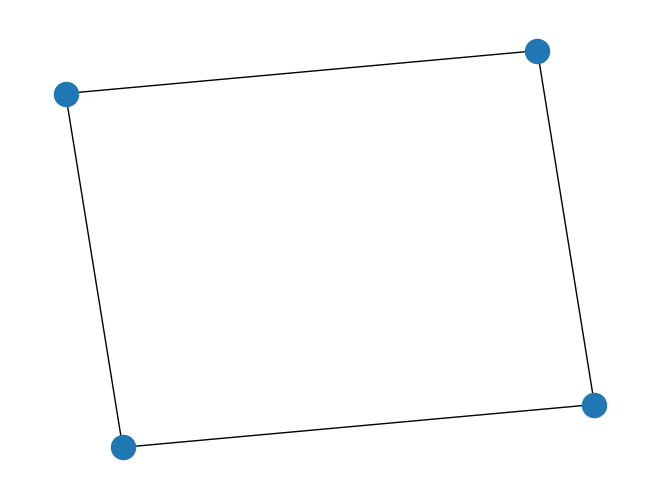

In [3]:
from dimod import BinaryQuadraticModel, to_networkx_graph
# definimos los valores de la matriz del BQM
bqm = BinaryQuadraticModel('SPIN')
bqm.add_variable(0, -1)
bqm.add_variable(1, -1)
bqm.add_variable(4, -1)
bqm.add_variable(5, -1)
# bqm.add_variable(6,-1) # lo añadí yo de prueba
bqm.add_interaction(0, 4, 1.0)
bqm.add_interaction(0, 5, 1.0)
bqm.add_interaction(1, 4, 1.0)
bqm.add_interaction(1, 5, 1.0)
# bqm.add_interaction(0, 1, 1.0) # lo añadí so de prueba


import networkx as nx

nx.draw(to_networkx_graph(bqm))

## Exacsolver.

```{index} Exacsolver
```

Este módulo está desarrollado principalmente para depuración de código, ya que puede resolver problemas con hasta 20 variable, aunque este número depende del sistema con el que se trabaje. 

Entonces utilizamos este solver para que nos resuelva el problema anterior

In [4]:
from dimod import ExactSolver

solver = ExactSolver()
response = solver.sample(bqm)
print(response.truncate(10))

   0  1  4  5 energy num_oc.
0 +1 +1 -1 -1   -4.0       1
1 -1 -1 +1 +1   -4.0       1
2 +1 +1 +1 -1   -2.0       1
3 +1 -1 +1 +1   -2.0       1
4 -1 +1 +1 +1   -2.0       1
5 +1 +1 -1 +1   -2.0       1
6 -1 +1 +1 -1    0.0       1
7 +1 -1 +1 -1    0.0       1
8 +1 +1 +1 +1    0.0       1
9 -1 +1 -1 +1    0.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


## Definiendo los valores de un Qubo.

Para introducir los valores de un programa de tipo QUBO, podemos utilizar por ejemplo un diccionario de Python o también un *defaultDictionary*. Para ver esto, supongamos que queremos crear la siguiente expresión:

$$x+5y+8xy$$

Entonces la matriz que debemos crear sería la siguiente:

$$\left[\begin{array}{cc}
1 & 8\\
 & 5
\end{array}\right]$$

Esto lo definiríamos con código python de la siguiente manera

In [5]:
from collections import defaultdict

# Q={}  #Esta puede ser una manera
# La otra forma pudiera ser
Q = defaultdict()

Q[('x','x')]=1
Q[('y','y')]=5
Q[('x','y')]=8

En el ejemplo anterior, estamos utilizando los nombres o índices de fila y columna de nuestra matriz QUBO 
como claves de nuestro diccionario. Las claves son los elementos entre paréntesis, como ('x', 'x') o ('x', 
'y'), que indican qué coeficiente estamos asignando en nuestra ecuación.

Las claves son cadenas o números enteros. Aquí vemos coeficientes lineales asignados a las variables 
x e y, así como un coeficiente cuadrático en el término x por y. El valor en nuestro diccionario, como los números 1, 5 y 8, son los coeficientes en nuestra ecuación QUBO.

Otra manera de agregar esta información es utilizando la clase *BinaryQuadraticModel* (que por otra parta es la que se ha utilizado en un código reciente de este capítulo). Veamos cómo utilizamos esto.

In [6]:
from dimod import BinaryQuadraticModel

bqm = BinaryQuadraticModel('BINARY')

bqm.add_variables_from([('x',1),('y',5)])
bqm.add_interactions_from([('x','y',8)])

Como vemos, podemos construir nuestra ecuación de forma similar a como vimos en código inmediatamente anterior,  asignando coeficientes lineales y coeficientes cuadráticos directamente usando las funciones 
*add_variables_from* y *add_interactions_from*, respectivamente.

Pero  también hay otra opción, dar la ecuación directamente al modelo cuadrático binario. Esto permitirá
construir la misma estructura de datos que si hubiéramos asignado directamente los coeficientes lineales y cuadráticos individualmente. Todos estos métodos producen el mismo BQM para la ecuación ecuación $x+5y+8xy$. 

El código para este último caso sería el siguiente

In [7]:
from dimod import Binary

In [8]:
x = Binary('x')
y= Binary('y')
bqm=x+5*y+8*x*y

Después quedaría enviar nuestro problema a la resolución del SDK de Ocean. Para ello tenemos dos opciones

In [9]:
from dimod import Sampler

# Mediante QUBO
sampleset = ExactSolver().sample_qubo( Q)


In [10]:
# Mediante BQM

sampleset = ExactSolver().sample(bqm)

Veamos a continuación cómo utilizar diferentes solvers para resolver el programa QUBO que hemos desarrollado anteriormente.


## Simulated Annealing

* Históricamente ha sido la principal referencia frente al QPU debido a la similitud de los principios subyacentes.

* Puede ser un buen solver/sampler para problemas pequeños

* Una buena herramienta para procesos de depuración

* Puede ser lento para problemas grandes y densos

In [11]:
from neal import SimulatedAnnealingSampler

from dimod import BinaryQuadraticModel, to_networkx_graph
# definimos los valores de la matriz del BQM
bqm = BinaryQuadraticModel('SPIN')
bqm.add_variable(0, -1)
bqm.add_variable(1, -1)
bqm.add_variable(4, -1)
bqm.add_variable(5, -1)
# bqm.add_variable(6,-1) # lo añadí yo de prueba
bqm.add_interaction(0, 4, 1.0)
bqm.add_interaction(0, 5, 1.0)
bqm.add_interaction(1, 4, 1.0)
bqm.add_interaction(1, 5, 1.0)


solver = SimulatedAnnealingSampler()

response = solver.sample(bqm, num_reads=10,
                          num_sweeps=1000,
                          initial_states=None,
                          beta_range=[10, 100])

In [12]:
print(response)

   0  1  4  5 energy num_oc.
0 +1 +1 -1 -1   -4.0       1
1 +1 +1 -1 -1   -4.0       1
2 +1 +1 -1 -1   -4.0       1
3 +1 +1 -1 -1   -4.0       1
4 +1 +1 -1 -1   -4.0       1
5 +1 +1 -1 -1   -4.0       1
6 +1 +1 -1 -1   -4.0       1
7 +1 +1 -1 -1   -4.0       1
8 +1 +1 -1 -1   -4.0       1
9 +1 +1 -1 -1   -4.0       1
['SPIN', 10 rows, 10 samples, 4 variables]


In [13]:
# Aquí se pueden ver los parámetros que acepta
sampler.sample?

Object `sampler.sample` not found.


## DWaveSampler

In [14]:
from dwave.system import DWaveSampler

sampler = DWaveSampler(solver=dict(topology__type='chimera'))

response = sampler.sample(
    bqm, num_reads=10,
    annealing_time=10,
    auto_scale=False,
    answer_mode='raw',
    label='Prueba_DWaveSampler'
    )
print(response)

SolverNotFoundError: Solver with the requested features not available

## LeapHybridSampler

* El solver más flexible

* Puede resolver problemas grandes y densos de forma eficiente utilizando recursos clásicos y cuánticos.

* 20000 variables fuly connected

* 1 millón de variables con al menos 200M biases

* Sólo un parámetro - límite de tiempo (el límite de tiempo mínimo se elige por defecto)



In [ ]:
from dwave.system import LeapHybridSampler

sampler = LeapHybridSampler()
print("Propiedades de este Sampler:\n")
print(sampler.properties)

response = sampler.sample(
    bqm, time_limit=3,
    label = "Prueba con LeapHybridSampler"
    )
print("\nla respuesta es la siguiente.\n")
print(response)

## Problema de las antenas.

En este caso tenemos la siguiente información.

* Conjunto de posibles localización de las antenas

* Información de qué localización interfiere con la otra

Deseamos buscar los puntos de ubicación de las antenas de manera que no hay interferencias entre ellas.

En el siguiente gráfico podemos ver las posibles interferencias entre estas antenas

![](img/antenas.PNG)

Empezamos con un conjunto de posibles ubicaciones de las antenas. Los números azules oscuros son todas 
posiciones donde posiblemente podríamos construir una antena. Queremos elegir ubicaciones para 
antenas para que no interfieran entre sí.  

Si las antenas están demasiado cerca  pueden interferir entre sí. Estos círculos más claros y sombreados 
representan la interferencia para cada ubicación.  

Si dos de estos círculos sombreados se superponen, entonces, si construyéramos antenas en ambas ubicaciones, tendríamos interferencias. En 
este ejemplo, las ubicaciones uno y dos tienen zonas de interferencia superpuestas, por lo que esas  antenas interferirían entre sí, lo que no queremos.

Lo primero que debemos hacer  es convertir este problema en un gráfico, para que podamos visualizar lo que está pasando. 
Tomamos cada lugar, cada uno de estos círculos numerados en azul oscuro... un nodo en nuestro gráfico. 

Si dos de las ubicaciones tienen sus círculos claros superpuestos, o si las dos ubicaciones interfieren entre sí... 
entre ellas. De esta manera podemos pasar el problema del mundo real al del dominio del problema y el mapa en un problema gráfico. Esto nos ayudará a ver lo que está pasando un poco más fácil.

![](img/antenas2.PNG)

Al convertirlo en un problema de grafos, pasamos de buscar "dónde construimos las antenas" a "cuál es el mejor subconjunto". Recuerde que la interferencia se asigna a los bordes, por lo que la no interferencia se asigna a ningún borde.

En el problema del grafo significa que buscamos un subconjunto de nodos sin aristas entre ellos.Esto es lo que se llama un conjunto independiente. Este es un problema conocido en teoría de grafos que tiene muchas aplicaciones y variaciones en el mundo real. Este caso cae en la clase de problemas NP-completos o NP-duros que pueden ser muy difíciles de ejecutar... 
para los ordenadores clásicos.

En este ejemplo, podríamos haber construido un QUBO para nuestro problema. Pero,en algunos de estos casos es bueno ver si ya hay ya desarrollada una herramienta o algoritmo allí para su resolución. Si la hay, entonces se puede simplemente ejecutar las herramientas existentes. Puede ahorrarse algo de trabajo si ya existe una herramienta de algoritmo QUBO para resolver algún tipo de  problema. Eche un vistazo a los paquetes especializados en Ocean y vea qué hay allí y si puede hacer que funcione para su problema antes de empezar desde cero. 

En este caso ya existe una herramienta diseñada para resolver este tipo de problemas como vamos a ver a continuación.

In [ ]:
# Import networkx for graph tools
import networkx as nx

# Import dwave_networkx for d-wave graph tools/functions
import dwave_networkx as dnx

# Import matplotlib.pyplot to draw graphs on screen
import matplotlib
matplotlib.use("tkAgg")
import matplotlib.pyplot as plt



# Set the solver we're going to use
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [ ]:
# Creamos el sampler
sampler = EmbeddingComposite(DWaveSampler())

# Create empty graph
G = nx.Graph()

# Añadimos arcos (edges) al gráfico (lo cual añadirá también nodos), siguiendo el diseño
#del gráfico mostrado anteriormente
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (6, 7)])

# Find the maximum independent set, 
# maximum_independent_set es un ejemplo de lo ya implementado en Ocean
S = dnx.maximum_independent_set(G, sampler=sampler, num_reads=10, label='Example - Antenna Selection')

# Print the solution for the user
print('Maximum independent set size found is', len(S))
print(S)

El código anterior es  un ejemplo de cómo podría ser ese programa. Primero importamos los paquetes  y definimos nuestro muestreador.  Estamos usando EmbeddingComposite con DWaveSampler en este ejemplo para ejecutar nuestro problema en el ordenador cuántico.

Definimos nuestro grafo usando el paquete NetworkX que es un paquete realmente bueno para problemas de grafos.

Definimos un grafo vacío (esa es la primera línea nx.graph()) y luego construimos el grafo añadiendo aristas entre los nodos. A medida que añadimos estas aristas,también se van añadiendo los nodos que que aún no existan.

Veamos ahora la  línea: *S = dnx.maximum_independent_set(G, sampler=sampler, num_reads=10, label='Example - Antenna Selection')*

Aquí es donde está todo lo bueno. Aquí es donde el software está definiendo el QUBO, enviándolo al muestreador que hemos 
definido.

In [ ]:
# visualizamos el diagrama
nx.draw(G)
plt.show()

Al ejecutar el programa, la respuesta que devolvió fue 2, 5 y 7. Cuando traducimos de nuevo a las antenas problema que nos 
comenzó con, esto nos dice que queremos construir nuestras antenas en los lugares 2, 5 y 7. Hay que  en cuenta que esto es sólo una posible solución.

In [ ]:
# Visualize the results
k = G.subgraph(S)
notS = list(set(G.nodes()) - set(S))
othersubgraph = G.subgraph(notS)
pos = nx.spring_layout(G)
plt.figure()

In [ ]:
# Save original problem graph
original_name = "antenna_plot_original.png"
nx.draw_networkx(G, pos=pos, with_labels=True)
#plt.savefig(original_name, bbox_inches='tight')
plt.show()

In [ ]:
# Save solution graph
# Note: red nodes are in the set, blue nodes are not
solution_name = "antenna_plot_solution.png"
nx.draw_networkx(k, pos=pos, with_labels=True, node_color='r', font_color='k')
nx.draw_networkx(othersubgraph, pos=pos, with_labels=True, node_color='b', font_color='w')
#plt.savefig(solution_name, bbox_inches='tight')
plt.show()

# Minimum Vertex Cover


En teoría de grafos, se denomina *Vertex Cover* (o cobertura de vértices) a un conjunto de vértices V tales que cada arista del grafo G es incidente al menos a un vértice del conjunto V. 

Al problema de encontrar la menor cobertura de vértices en un grafo se denomina *problema de la cobertura de vértices*

En el grafo que se puede ver en la siguiente imagen, los vértices de color rojo formarían este conjunto de vértices denominado vertex cover.

![vertex cover](img/vertexcober.PNG)

A continuación vamos a mostrar un grafo, en el que se ha añadido las etiquetas de los nodos


In [ ]:
import networkx as nx
s5 = nx.star_graph(4)

In [ ]:
nx.draw(s5, with_labels = True)

En este sencillo ejemplo un vertex cover mínimo claramente estaría formado por el nodo marcado con etiqueta 0, pero veamos cómo podríamos detectar este nodo de forma fácil con las herramientas que nos proporciona ocean.

Primero definimos el solver que vamos a utilizar

In [ ]:
from dimod.reference.samplers import ExactSolver
sampler = ExactSolver()

a continuación utilizamos el paquete denominado *dwave-networks* y ejecutamos el siguiente código

In [ ]:
import dwave_networkx as dnx
print(dnx.min_vertex_cover(s5, sampler))

Podemos cambiar el solver, para enviar a los ordenadores de Dwave la ejecución del problema

In [ ]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
print(dnx.min_vertex_cover(s5, sampler))

Resolvamos ahora el mismo problema pero con un grafo diferente.

In [ ]:
w5 = nx.wheel_graph(5)
nx.draw(w5, with_labels = True) 

Resolvemos ahora el problema de encontrar la cobertura de vértices mínima 

In [ ]:
print(dnx.min_vertex_cover(w5, sampler)) 

Observar que en este ejemplo, la solución al problema planteado no es única, pues por ejemplo, también se puede encontrar otra solución diferente, las cuales se pueden encontrar ejecutando varias veces el código anterior.

In [ ]:
print(dnx.min_vertex_cover(w5, sampler)) 

Lo podemos hacer con 10 nodos

In [ ]:
c5 = nx.circular_ladder_graph(5)
nx.draw(c5, with_labels = True) 

Y una solución de mínimo vertex cover podría ser la siguiente

In [ ]:
sampler = ExactSolver()
print(dnx.min_vertex_cover(c5, sampler)) 